#### 简述
这一单元主要讲述过程的抽象，从表达式到组合式，再到过程；期间伴随抽象。

#### 两种递归
- 线性递归（计算模型）：对于一个可以使用线性递解决的问题，可以使用线性递归或者迭代计算过程计算，两者存在转换管理。在高级语言中，线性迭代会使用`for`、`while`等语法糖。而递归一般都具有尾递归的形式。
对于递归来说，都是先展开，然后在规约.如下图所示：
![](.static/2024-08-20-15-03-19.png)
![](.static/2024-08-20-14-59-35.png)

对于迭代来说，不会再维持一个函数栈
![](.static/2024-08-20-15-03-28.png)
![](.static/2024-08-20-15-01-21.png)

其差别在于返回的时候，递归会返回一个表达式，而迭代会返回一个函数调用；其中表达式需要知道函数的返回值之后再求值，而函数调用则可以不用维护当前调用环境。这就是两者之间**差异**。

- 树形递归（计算模型） 树形递归，如果自顶向下计算，会存在大量的冗余计算，如果自底向上计算并将上一步需要的结果储存起来，可以极大的增快计算速度(一般被称为动态规划)。

线性的递归，维护了一些中间的变量；所以只要知道某一个节点这些变量值，可以知道当前节点的计算结果。
而树形递归，想要只要任何一个中间节点的结果，都需要对递归的路径展开合并，来计算结果。

树形的递归非常符合人类的直观理解。

![斐波拉数列](.static/2024-08-19-10-28-14.png)


In [22]:
## 代码准则，只使用第一章中能和所介绍sheme语法完全对应的python语法

import time

def timer(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()  # 记录开始时间
        result = func(*args, **kwargs)  # 执行被装饰的函数
        end_time = time.time()  # 记录结束时间
        elapsed_time = end_time - start_time  # 计算执行时间
        print(f"Function '{func.__name__}' took {elapsed_time:.8f} seconds to complete.")
        return result
    return wrapper


exercies 1.16
求幂, 使用迭代过程求幂是一个很简单的模型，使用二分思想，可以将求幂从常熟时间优化到对数时间。先实现这一个方法
![](.static/2024-08-19-10-39-51.png)

In [23]:
def is_even(x):
    return x % 2 == 0

def fast_expt(b, n):
    if n == 0:
        return 1
    elif is_even(n):
        return fast_expt(b, n//2) ** 2  # 这里将平方看作一个基本运算符，而不是一个函数，本质一样
    else:
        return b * fast_expt(b, n-1)

for x in range(8000):
    fast_expt(2, 2200)

In [24]:
def expt(b, n):
    if n == 0:
        return 1
    return b * expt(b, n - 1)

for x in range(8000):
    expt(2, 2200)

fast-expt使用了0.4s，而使用线性递归的expt却使用了26.4s。这就是指数级别差异。fast-expt当然也存在线性递归的计算方式，重要的怎么找出它，这是一个联系，其关键思路在于：
![](.static/2024-08-19-11-22-40.png)

虽然利用该提示可以凑出解题思路，但是更重要的是如何泛化该思路，使其具有通用性。当实现完以下的思路时候，发现自己的思路被很久之前的动态规划思路限制了，总是将其与之前做过的某些经典题型对象，但是这个提的`状态表很简单`，但是隐藏的很深，也很难发现。

In [25]:
## 线性迭代的实现
def fast_expt_linear(b, n, a):
    if n == 0:
        return a
    elif n==1:
        return b * a
    if is_even(n):
        return fast_expt_linear(b ** 2, n // 2, a)
    else:
        return fast_expt_linear(b ** 2, (n - 1) // 2, a * b)

## 正确性验证
# assert(fast_expt(2, 0) ==  fast_expt_linear(2, 0, 1))
# assert(fast_expt(2, 1) ==  fast_expt_linear(2, 1, 1))
# assert(fast_expt(2, 2) ==  fast_expt_linear(2, 2, 1))
# assert(fast_expt(2, 2321) ==  fast_expt_linear(2, 2321, 1))

for x in range(80000):
    fast_expt_linear(2, 2200, 1)

以下是exercise 1.18和exercise 1.19，将作为以上思路的一种加强练习：

In [26]:
## 基于加，加倍和折半操作实现正数的乘法：
def add(a, b):
    return a + b

def half(a):
    return a // 2

def double(a):
    return a * 2
    
## 已经有了幂操作的实现经验，如法炮制即可
def mult_fast(a, b, c):
    if b == 0:
        return 0
    elif b == 1:
        return a + c
    elif is_even(b):
        return mult_fast(double(a), half(b), c)
    else:
        return mult_fast(double(a), half(b - 1), add(a, c))

# assert(mult_fast(10432, 104320, 0) == 10432 *104320)
for x in range(8000):
    mult_fast(10432, 104320, 0)

In [27]:
def mult_simple(a, b):
    if a == 0 or b == 0:
        return 0
    else:
        return a + mult_simple(a, b - 1)
    
for x in range(8000):
    mult_simple(10432, 1000)

可以看到，fast是0.4s，而simple是9.5s，对数级别的增速。。。

### 1.2.5 最大公倍数
![](.static/2024-08-19-12-46-32.png)
以上便是最大公倍数的核心思路，这个方法被称为欧几里得算法。

In [28]:
def gcd(a, b):
    if b == 0:
        return a
    else: 
        return gcd(b, a % b)  # 这里如果使用正则序，先展开然后规约，那么会形成一个树形递归。
    
print(gcd(12100, 430))

10


### 1.2.6 素数检测
对于一个树n，如何检测其为素数呢？朴素想法为从1-n依次除n,存在一个能除尽的树，它就不是素数。可以简单优化一下，将范围缩小至[0, n/2]。更加有效的方法是，费马检测：
![](.static/2024-08-19-13-00-46.png)

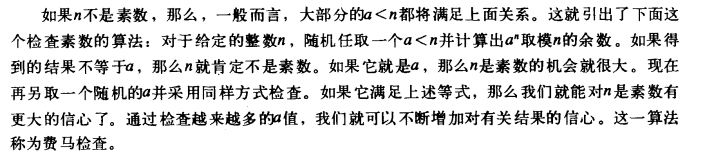

注意：满足费马定理的一定是素数，但是非素数有可能也满足费马小定理，而费马检测有效是基于以下的事实：满足费马小定理的非素数非常少。。。

![](.static/2024-08-19-13-01-56.png)


In [29]:
# 先实现一个简单的素数查找func

def find_divisor(n , test_divisor):
    def next_d(d):
        return d + 1

    if test_divisor ** 2 > n:
        return n
    elif n % test_divisor == 0:
        return test_divisor
    else:
        return find_divisor(n, next_d(test_divisor))



def smallest_divisor(n):
    return find_divisor(n , 2)

smallest_divisor(2516)
print(smallest_divisor(199))
print(smallest_divisor(1999))
print(smallest_divisor(19999))

199
1999
7


In [30]:
## 为了完成费马测试，先实现一个简单的 幂取模
def is_even(x):
    return x % 2 == 0

def remainder(a, b):
    return a % b  # 有时间将这个优化一下

def expmod(base, exp, m):
    if exp == 0:
        return 1
    elif is_even(exp):
        return remainder(expmod(base, exp // 2, m) ** 2, m)
    else:
        return remainder(expmod(base, exp-1, m) * base, m)

assert(expmod(2, 11, 7) == ((2 ** 11) % 7))
assert(expmod(8, 21, 7) == ((8 ** 21) % 7))

In [31]:
## 费马测试
import random

def fermat_test(n):   # false 一定不是素数，true，大概率是素数
    def try_it(a):
        return expmod(a, n, n) == a
    return try_it(random.randint(1, n-1))


def fast_prime(n, times):
    if times == 0:
        return True
    elif fermat_test(n):
        return fast_prime(n ,times - 1)
    else:
        return False

assert(fast_prime(904283, 30))


In [32]:
def prime(n):
    return fast_prime(n, 40)

# 素数的查找时间测试
@timer
def find_3_prime(s):
    def impl(s):
        ret = []
        while len(ret) < 3:
            if prime(s):
                ret.append(s)
            s += 1
    for x in range(1000):
        impl(s)

find_3_prime(1000)
find_3_prime(10000)
find_3_prime(100000)
find_3_prime(1000000)

# Function 'find_3_prime' took 0.84503913 seconds to complete.
# Function 'find_3_prime' took 1.21263123 seconds to complete.
# Function 'find_3_prime' took 1.52242041 seconds to complete.
# Function 'find_3_prime' took 1.69216442 seconds to complete.

Function 'find_3_prime' took 0.85430002 seconds to complete.
Function 'find_3_prime' took 1.19195247 seconds to complete.
Function 'find_3_prime' took 1.51901627 seconds to complete.
Function 'find_3_prime' took 1.68129563 seconds to complete.


In [33]:
# exercise 1.23
@timer
def smallest_divisor_ts(x):
    for x in range(120000):
        smallest_divisor(x)


# 更快版本的测试
def find_divisor_f(n , test_divisor):
    def next_d(t):
        if t == 2:
            return 3
        else:
            return t + 2

    if test_divisor ** 2 > n:
        return n
    elif n % test_divisor == 0:
        return test_divisor
    else:
        return find_divisor_f(n, next_d(test_divisor))

@timer
def smallest_divisor_f(n):
    for x in range(120000):
        find_divisor_f(x, 2)

smallest_divisor_ts(112233123)

smallest_divisor_f(21311)

Function 'smallest_divisor_ts' took 1.21134663 seconds to complete.
Function 'smallest_divisor_f' took 0.64177203 seconds to complete.


In [34]:
## 能通过费马检测的非素数
## 100,000,000有561， 1105， 1729， 2465，2821，6601

for x in [561, 1105, 1729, 2465, 2821, 6601]:
    print(prime(x)) 

True
True
True
True
True
True


In [35]:
# miller rabin 检测
# 检测原理，对于一个需要检测的数n，对于一个[1, n-1]的数字a，如果a平方取模n为1，n就不是素数。对于非素数奇数n，至少有一半的a<n，a的平方取模为1。
# 因此每次检测结果错误概率都将减半，

def nontrivial_square_root(n, a):
    if a != 1 and a != (n -1):
        return 1 == remainder(a ** 2, n)
    else:
        return False
    

def expmod(base, exp, m):
    if exp == 0:
        return 1
    elif nontrivial_square_root(m, base):
        return 0  # 不是素数
    elif is_even(exp):
        return remainder(expmod(base, exp // 2, m) ** 2, m)
    else:
        return remainder(expmod(base, exp-1, m) * base, m)
    
def miller_rabin_test(n):   # false 一定不是素数，true，大概率是素数
    def try_it(a):
        return expmod(a, n-1, n) == 1
    return try_it(random.randint(1, n-1))


def fast_prime(n, times):
    if times == 0:
        return True
    elif miller_rabin_test(n):
        return fast_prime(n ,times - 1)
    else:
        return False
    
for x in [561, 1105, 1729, 2465, 2821, 6601]:  # 
    print(fast_prime(x, 30)) 

for x in [999169, 999907, 999239]: # 真正素数
    print(fast_prime(x, 30)) 

False
False
False
False
False
False
True
True
True
